In [ ]:
# Import required packages
import numpy as np               # for mathematical operations, for arrays
import pandas as pd              # Used for different data manipulation tasks
import matplotlib.pyplot as plt  # Used for Plotting 
import random                    # For random number generator
import warnings
warnings.filterwarnings('ignore')# To avoid warnings note while running the notebook

# Section 1 : Implementing Gradient Descent

Gradient Descent is an first order optimization algorithm to find the local minimum differentiable function (usually a loss function or an objective function). We start with a random point on the function and move in the negative direction of the gradient of the function to reach the find minimum.

Let $F(x)$ be a differentiable function parameterised by $x$ and $x^*$ be the parameter value which minimises $F(x)$. The initial value is $x_0=a_0$. To determine $x^*$ using gradient descent, at each of the $i^{th}$ the parameter updation rule is:

\begin{align*}
x_i = x_{i-1} - \eta \nabla F(a_{i-1}), \hspace{1cm} i\geq 1
\end{align*}  
where $x_i$ is updated value of the parameter in the $i^{th}$ iteration. 

\begin{align*}
\eta \nabla F(a_{i-1}) = \eta \frac{dF}{dx}\bigr \rvert_{x=a_{i-1}}
\end{align*} 

**Stopping Criteria**: Following are three ways which are used as stopping criteria in gradient descent algorithm:
1. Limiting number of iterations
2. Threshold for change in the parameter (i.e difference between the updated parameter and parameter in the previous iteration) --> Change in parameter > Threshold
3. Threshold for change in gradient step
                  
**Question** : Find $x^*$ which minimises $F(x) = (x+5)^2$ using gradient descent 

**Note : Few variables are set to a given value, read the instructions in the pseudo code**

**Pseudo Code**:
1. Initialise the parameter ('x') with some random number,set learning rate = 0.01(section 4 has details on "how to select appropriate learning rate for a given problem"), set threshold = 0.000001,
2. Define a function for calculating differential of F (Hint : Use lambda method for single line of code)
3. Compute the updated value of the parameter using the formula: $x_i = x_i-1 - \eta \nabla F(a_{i-1})$ 
4. Iterate over step 3 until the stopping criteria is satisfied (You have to choose stopping criteria appropriately)

## 1.1 Implementing Code
Implement the above pseudo code and print the optimum value of $x$ and $F(x)$. Also print the number of iterations required to reach that optimum.

**Note : Carefully choose your stopping criteria for reaching optimum**

In [ ]:
x=0
n=0.01
threshold=0.000001

def derivative(f,a,h):
   return (f(a + h) - f(a))/h
  
f = lambda x: (x+5)**2
b1=x
iterations=0
while True: 
    iterations+=1
    b2=b1;
    b1=b1-n*derivative(f,b2,0.00000001);
    if abs(b2-b1)<threshold:
        break
print('The minimum of the function is at',b1)
print('The minimum value of function is ',f(b1))
print('The number of iterations are',iterations)

The minimum of the function is at -4.999951133096238
The minimum value of function is  2.387974283256508e-09
The number of iterations are 571


# Section 2 : Linear Regression - Finding the Regression parameters using Normal Equation (Analytical Approach)
**Dataset** : dataset1.csv (given)

Given a dataset (here dataset1.csv), find the coefficients (parameters) using the Normal Equation and predict the outputs for the same dataset (dataset1.csv). Given input features in matrix $X$ and observed output or target vector $y$, the regression parameters are given by the equation:
![Normal%20Equation.png](attachment:Normal%20Equation.png)


**Pseudo Code:**
1. Append ones to X, let say that as "X_appended" (This is to be done when there is intercept, if you know before hand that intercept is zero, then this step can be ignored)
2. Find the pseudo Inverse of the X_appended
3. Find the dot product of transpose of X_appended and target vector (y),
4. Find "theta" (parameters) using "Normal Equation" given above (i.e Matrix multiplication of outputs of Step 2 and Step 3)
5. Predict ouputs for X_new by appending it with ones and then using the formula $y=X_{new}\theta$

**Note : When you perform matrix multiplications or dot products on vectors or matrices, always keep track of the matrix or vectors shapes. This helps you in avoiding implementation errors.**

<div class="alert alert-block alert-warning">
**Implementation Note:** Step 1 is crucial. We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [ ]:
data=pd.read_csv('dataset1.csv')
data['bias']=np.ones(30)
print(data)
X_appended=data[['bias','X']].to_numpy()
y=data['y'].to_numpy()
theta_analytical=np.matmul(np.linalg.inv(np.matmul(np.transpose(X_appended),X_appended)),(np.matmul(np.transpose(X_appended),y)))
print('theta value for analytical approach is ',theta_analytical)

     X      y  bias
0    0   20.0   1.0
1    1   22.0   1.0
2    2   29.0   1.0
3    3   33.0   1.0
4    4   40.0   1.0
5    5   40.0   1.0
6    6   47.0   1.0
7    7   53.0   1.0
8    8   55.0   1.0
9    9   63.0   1.0
10  10   69.0   1.0
11  11   68.0   1.0
12  12   74.0   1.0
13  13   80.0   1.0
14  14   86.0   1.0
15  15   94.0   1.0
16  16   95.0   1.0
17  17  101.0   1.0
18  18  107.0   1.0
19  19  107.0   1.0
20  20  115.0   1.0
21  21  123.0   1.0
22  22  128.0   1.0
23  23  129.0   1.0
24  24  131.0   1.0
25  25  143.0   1.0
26  26  147.0   1.0
27  27  147.0   1.0
28  28  157.0   1.0
29  29  163.0   1.0
theta value for analytical approach is  [17.78924731  4.90189099]


### 2.1 Function to predict the outputs
Implement the predict function below. Predict the outputs for the given data (dataset1.csv), plot the predicted outputs Vs input features and scatter plot for dataset1.csv (X,y)

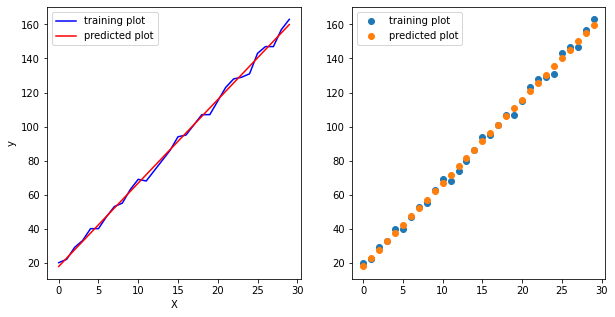

In [ ]:
def predict(X, theta):
  prediction=np.matmul(X,theta)
  return prediction

predicted=predict(X_appended,theta)
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(data['X'],data['y'],'b')
plt.plot(data['X'],predicted,'r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['training plot','predicted plot'])
plt.subplot(122)
plt.scatter(data['X'],data['y'])
plt.scatter(data['X'],predicted)
plt.legend(['training plot','predicted plot'])


# Section 3 : Linear Regression - Find the Regression parameters using Gradient Descent
This section is about applying gradient descent algorithm to find theta at which a cost function (Mean Squared Error) is minimum. This can be done using the gradient descent algorithm discussed in Section 1, where $x$ is replaced by the regression parameters. 

Refer to pseudo code in Section 1 for gradient descent algorithm. In simple terms, we initialise the regression parameters with some random number and we compute the gradient step to update the regression parameters.

### 3.1. Import and visualise the dataset

Text(0.5, 1.0, 'Scatter plot')

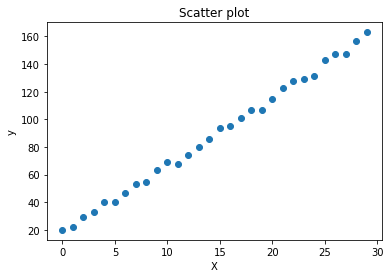

In [ ]:
data=pd.read_csv('dataset1.csv')
plt.scatter(data['X'],data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot')

### 3.2. Compute Cost Function - Mean Squared Error (MSE) 
The cost function used is Mean Squared Error (MSE) represented as $J(\theta)$ and is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is a linear model given by: 
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. This way you can know whether you choose high learning rate or low learning rate. Suppose if your learning rate is too high, you can see your cost will go up and down, but will not converge. If you choose good learning rate, then you can see your cost going down smoothly and converges.

In this you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

In [ ]:
def computeCost(X, y, theta):
  J=0
  h=np.matmul(X,theta)
  for i in range(len(X)):
    J=J+(h[i]-y[i])**2
  J=J/(2*len(X))
  return J

In [ ]:
computeCost(X_appended,y,theta)

2.422227165986895

## 3.3. Implementation of Gradient Descent 

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


**Important implementation notes**

The function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a python list. If you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [ ]:
def gradient(X_appended, y, theta):
  grad=[0,0]
  h=np.matmul(X_appended,np.array(theta))
  for i in range(len(X_appended)):
    grad=grad+(h[i]-y[i])*X_appended[i]
  newgrad = []
  for x in grad:
    newgrad.append(x/len(y))
  return newgrad

def gradientDescent(X_appended, y, theta, alpha, precision):
  b1=theta
  iterations=0
  J_history=[]
  while True: 
    iterations+=1
    b2=b1;
    b1=b1-np.dot(alpha,gradient(X_appended,y,b2));
    J_history.append(computeCost(X_appended,y,b1))
    if computeCost(X_appended,y,b2)-computeCost(X_appended,y,b1)<=precision:
      break
  theta=b1
  cost=computeCost(X_appended,y,theta)
  count=iterations
  return theta, J_history, cost, count

### Run gradientDescent function to train the model here
**Note : Use the learning rate(alpha) and precision given below. Initialise theta with zeros is suggested here (but you can initialise with different numbers)**

Print the final theta (learnt parameters), number of iterations to converge, value of cost function at the convergence.

In [ ]:
# initialize fitting parameters with zeros
theta = [0,0]

# Play with these setting to see how these parameters play a huge, for a decent converge use below parameters
precision = 0.000001
alpha = 0.001

[theta_final,J_history,cost,count]=gradientDescent(X_appended,y,theta,alpha,precision)
print('final theta is',theta_final)
print('no. of iterations',count)

final theta is [17.6687466   4.90802378]
no. of iterations 18995


## 3.4. Plot the Training Curve
**Tip:** Initially the change in the loss(J) are drastic and dominating. So while plotting you may remove the first 10% of the iterations and then plot to see a smooth curve in the training process

Text(0, 0.5, 'Loss')

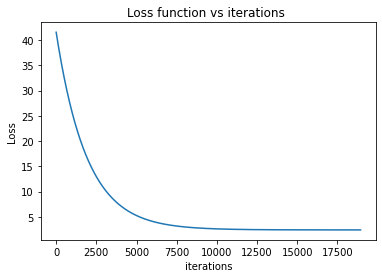

In [ ]:
plt.plot(range(count-50),J_history[50:])
plt.title('Loss function vs iterations ')
plt.xlabel('iterations')
plt.ylabel('Loss')

## 3.5. Predict Outputs and Plot the results
Same as Step 5 in the Section 2. You can use the same function predict(X, theta)

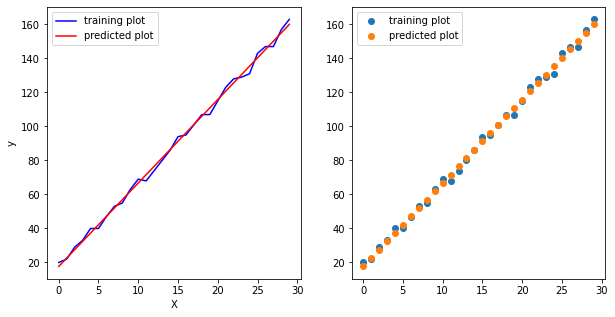

In [ ]:
predicted=predict(X_appended,theta_final)
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(data['X'],data['y'],'b')
plt.plot(data['X'],predicted,'r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['training plot','predicted plot'])
plt.subplot(122)
plt.scatter(data['X'],data['y'])
plt.scatter(data['X'],predicted)
plt.legend(['training plot','predicted plot'])


# Section 4 : Selecting appropriate learning rate
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞. So dont worry even if you cost as inf or NaN

**Repeat the training as in Section 3 with different values of alpha as listed below. Print the alpha, cost and number of iterations it took for every alpha**

In [ ]:
theta = [0,0]
precision = 0.000001

# You can change this set of alphas and try out different, but keep your range less than 1
alphas = [0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01,0.03, 0.05, 0.07, 0.1, 0.3]
ans=[]
for alpha in alphas:
  [theta_final,J_history,cost,count]=gradientDescent(X_appended,y,theta,alpha,precision)
  ans.append([cost,count])

In [ ]:
for i in range(len(alphas)):
  print('for the value of alpha '+str(alphas[i])+' cost is ' + str(ans[i][0])+ ' and the no. of iterations is '+str(ans[i][1]))

for the value of alpha 0.0001 cost is 2.4413078221495086 and the no. of iterations is 146029
for the value of alpha 0.0003 cost is 2.4285868952040355 and the no. of iterations is 55663
for the value of alpha 0.0005 cost is 2.4260422656254055 and the no. of iterations is 35347
for the value of alpha 0.0007 cost is 2.424951548553128 and the no. of iterations is 26165
for the value of alpha 0.001 cost is 2.424134514167511 and the no. of iterations is 18995
for the value of alpha 0.003 cost is 2.4228624540119243 and the no. of iterations is 7029
for the value of alpha 0.005 cost is 2.4226074531485455 and the no. of iterations is 4412
for the value of alpha 0.007 cost is 4863.808530001111 and the no. of iterations is 1
for the value of alpha 0.01 cost is 16660.876472111107 and the no. of iterations is 1
for the value of alpha 0.03 cost is 276113.077049 and the no. of iterations is 1
for the value of alpha 0.05 cost is 850008.8966916668 and the no. of iterations is 1
for the value of alpha 0

## Section 5: Questions on Analytical and Gradient Descent approaches

1. Are the results from both the analytical and gradient descent approach are same? If not, why?
2. When do u prefer analytical approach and gradient descent approach? Hint: Explain interms of size of the dataset
3. Can we use different cost function in place of MSE? If we do, where will be changes in the gradient descent step?(Just mention using words, equations are not required)
4. How does the initialisation of the parameters $\theta$ effects the convergence? In this case we initialised $\theta$ to zeros. What happens if we choose closer to solution and farther to solution?
5. Any drawbacks of Gradient descent that you could think of? Hint : Interms of Convergence rate.
6. What if number of features increases and how does it effect the gradient descent approach and analytical approach? Note:This might require some time to look for appropriate concepts. But do note that this difference is very important to understand.
7. Comment your observations on selecting appropriate learning rate.

### **Answers**

1) The results are almost the same but are not exactly the same because they both use different approaches to solve the problem. The Analytical uses matrix operations and outputs a single correct answer, whereas the gradient descent approach loops over to find the optimum answer. So, both are different and it completely depends on the data to choose between the two. 

2) When size of dataset is huge the matrix operations like inverse takes a long time, memory and huge computational costs. Then instead of Analytical solution, Gradient descent could be used which is slow but outputs a fairly good answer. 


3) If we use different cost function then the gradient of the cost function changes, eventually the gradient descent step changes.



4) Initialization of parameters is a crucial step to obtain an optimum solution. If we initialize near a local minima, we eventually get a solution which is local minima. So initialization should be such that we get a global minima. 

If we initialize near the solution it converges fast in a smaller number of iterations. If we initialize far from the solution it converges slowly and takes high number of iterations

5) Gradient Descent has a low convergence rate. If we want a high accuracy then there should be a high number of iterations. Because of which there will be a low convergence rate. 
Also, Gradient Descent converges to local minima if our initialization is not handled well. Which is also a drawback. 


6) If the number of features increases the column size of the X matrix increases. Calculation of inverse of XT*X becomes computationally difficult. Actuallly it depends on the number of features. If column size is very high in the order of 1000's, using gradient descent approach is preferable comparable to analytical approach. But if the features are around 10-50, analytical approach can be used.(Again it also depends on the training data size)

With the increase in features the gradient descent approach is somewhat changed because of added parameters. Also, we need to find extra parameters.

7) Actually learning rate shouldn't be too small, because if it is small it moves in small steps and takes many iterations to converge. The appropriate learning rate could be found out by calculating the cost for different alphas from around 0.3 and decreasing continuously. If we find that there is no decrease in cost even after decreasing the learning rate, then we can say that we have reached an optimum learning rate and fix the value.
